# **Computer Assignment2 Bonus Question**
## **Course** : Deep Learning Course
## **Department of Electrical Engineering At Sharif University of Technology**
### **Author**: M.Sina Hasan-Nia 
### **ID Number**: 96108515

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import datasets, layers, losses,models
from tensorflow import keras
from keras.applications.xception import Xception, preprocess_input,decode_predictions
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
#from  keras.preprocessing.image import image_to_array
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import MaxPooling2D
from google.colab import drive
drive.mount('/content/drive')
import os
import collections
from collections import defaultdict
from shutil import copy
from shutil import copytree, rmtree
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from scipy.io import loadmat

Mounted at /content/drive


# Q3 

## Part B

In [ ]:
base_model = Xception(input_shape=(299, 299, 3),include_top=True, weights='imagenet')
base_model.trainable = False # freeze the base model
inputs = keras.Input(shape=(150, 150, 3))
path = '/content/drive/MyDrive/image/pinapple.jfif'
x = (image.load_img(path,target_size=(299,299,3)))
x = preprocess_input(tf.Variable((image.img_to_array(x)))[np.newaxis,...])
#base_model.summary()
y_pred = base_model(x)
model_pred =decode_predictions(y_pred.numpy(), top=3)
thr =0.5
detector = [model_pred[0][i][2]>thr  for i in range(0,3)]
print(model_pred)
print(model_pred[0][0][1],"is : ",detector[0] )
print(model_pred[0][1][1],"is : ",detector[1] )
print(model_pred[0][2][1],"is : ",detector[2] )

49152/35363 [=========================================] - 0s 0us/step
[[('n07753275', 'pineapple', 0.94270843), ('n07747607', 'orange', 0.0010595159), ('n07753592', 'banana', 0.0008359188)]]
pineapple is :  True
orange is :  False
banana is :  False


## Part c

In [ ]:
path = '/content/drive/MyDrive/image/cake.jfif'
x = (image.load_img(path,target_size=(299,299,3)))
x = preprocess_input(tf.Variable((image.img_to_array(x)))[np.newaxis,...])
#base_model.summary()
y_pred = base_model(x)
model_pred =decode_predictions(y_pred.numpy(), top=3)
thr =0.5
detector = [model_pred[0][i][2]>thr  for i in range(0,3)]
print(model_pred)
print(model_pred[0][0][1],"is : ",detector[0] )
print(model_pred[0][1][1],"is : ",detector[1] )
print(model_pred[0][2][1],"is : ",detector[2] )

[[('n07836838', 'chocolate_sauce', 0.23674652), ('n07614500', 'ice_cream', 0.03872641), ('n07871810', 'meat_loaf', 0.03390128)]]
chocolate_sauce is :  False
ice_cream is :  False
meat_loaf is :  False


## Part d

In [ ]:
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    tf.keras.utils.get_file(
    'food-101.tar.gz',
    'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz',
    cache_subdir='/content',
    extract=True,
    archive_format='tar',
    cache_dir=None
    )
    print("Dataset downloaded and extracted!")

In [ ]:
# Download data and extract it to folder
get_data_extract()

4996292608/4996278331 [==============================] - 196s 0us/step
Dataset downloaded and extracted!


# New section

In [ ]:
os.listdir('food-101/images')

['deviled_eggs',
 'baklava',
 'bruschetta',
 'beef_carpaccio',
 'spaghetti_carbonara',
 'macaroni_and_cheese',
 'crab_cakes',
 'oysters',
 'pancakes',
 'spring_rolls',
 'french_toast',
 'ice_cream',
 'mussels',
 'eggs_benedict',
 'caesar_salad',
 'croque_madame',
 'fish_and_chips',
 'baby_back_ribs',
 'breakfast_burrito',
 'lasagna',
 'chocolate_mousse',
 'filet_mignon',
 'caprese_salad',
 'gyoza',
 'gnocchi',
 'chicken_wings',
 'huevos_rancheros',
 'club_sandwich',
 'beef_tartare',
 'tacos',
 'foie_gras',
 'cheesecake',
 'dumplings',
 'chicken_quesadilla',
 'scallops',
 'cheese_plate',
 'pulled_pork_sandwich',
 'paella',
 'macarons',
 'takoyaki',
 'prime_rib',
 'garlic_bread',
 'panna_cotta',
 'donuts',
 'churros',
 'falafel',
 'edamame',
 'strawberry_shortcake',
 'hot_and_sour_soup',
 'frozen_yogurt',
 'escargots',
 'cup_cakes',
 'red_velvet_cake',
 'pho',
 'fried_rice',
 'risotto',
 'waffles',
 'peking_duck',
 'tiramisu',
 'ceviche',
 'beet_salad',
 'bibimbap',
 'apple_pie',
 'lobst

In [ ]:
os.listdir('food-101/meta')

['classes.txt',
 'test.json',
 'labels.txt',
 'train.txt',
 'train.json',
 'test.txt']

In [ ]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [ ]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [ ]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [ ]:
# Check how many files are in the train folder

train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
print("Total number of samples in train folder")
print(train_files)

Total number of samples in train folder
75750


In [ ]:
# Check how many files are in the test folder
test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
print("Total number of samples in test folder")
print(test_files)

Total number of samples in test folder
25250


In [ ]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [ ]:
# picking 3 food items and generating separate data folders for the same
food_list = ['ice_cream','pizza']
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

In [ ]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into ice_cream
Copying images into pizza


In [ ]:
print("Total number of samples in train folder")
train_files = sum([len(files) for i, j, files in os.walk("food-101/train_mini")])
print(train_files)

Total number of samples in train folder
1500


In [ ]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into ice_cream
Copying images into pizza


In [ ]:
print("Total number of samples in test folder")
test_files = sum([len(files) for i, j, files in os.walk("food-101/test_mini")])
print(test_files)

Total number of samples in test folder
500


In [ ]:
img_width, img_height = 299, 299
def train_model(n_classes,num_epochs, nb_train_samples,nb_validation_samples):
  K.clear_session()

  img_width, img_height = 299, 299
  train_data_dir = 'food-101/train_mini'
  validation_data_dir = 'food-101/test_mini'
  batch_size = 16
  bestmodel_path = 'bestmodel_'+str(n_classes)+'class.hdf5'
  trainedmodel_path = 'trainedmodel_'+str(n_classes)+'class.hdf5'
  history_path = 'history_'+str(n_classes)+'.log'

  train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

  test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

  train_generator = train_datagen.flow_from_directory(
      train_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical')

  validation_generator = test_datagen.flow_from_directory(
      validation_data_dir,
      target_size=(img_height, img_width),
      batch_size=batch_size,
      class_mode='categorical')


  xception = Xception(weights='imagenet', include_top=False)
  x = xception.output
  x = GlobalAveragePooling2D()(x)
  x = Dense(128,activation='relu')(x)
  x = Dropout(0.2)(x)

  predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

  model = Model(inputs=xception.input, outputs=predictions)
  model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
  checkpoint = ModelCheckpoint(filepath=bestmodel_path, verbose=1, save_best_only=True)
  csv_logger = CSVLogger(history_path)

  history = model.fit_generator(train_generator,
                      steps_per_epoch = nb_train_samples // batch_size,
                      validation_data=validation_generator,
                      validation_steps=nb_validation_samples // batch_size,
                      epochs=num_epochs,
                      verbose=1,
                      callbacks=[csv_logger, checkpoint])

  model.save(trainedmodel_path)
  class_map = train_generator.class_indices
  return history, class_map

In [ ]:
# Train the model with data from 2 classes
n_classes = 2
epochs = 5
nb_train_samples = train_files
nb_validation_samples = test_files

history, class_map_2 = train_model(n_classes,epochs, nb_train_samples,nb_validation_samples)
print(class_map_2)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
83697664/83683744 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
93/93 [==============================] - ETA: 0s - loss: 0.6884 - accuracy: 0.5896
Epoch 00001: val_loss improved from inf to 0.59894, saving model to bestmodel_2class.hdf5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


93/93 [==============================] - 174s 2s/step - loss: 0.6884 - accuracy: 0.5896 - val_loss: 0.5989 - val_accuracy: 0.8589
Epoch 2/5
93/93 [==============================] - ETA: 0s - loss: 0.5840 - accuracy: 0.7931
Epoch 00002: val_loss improved from 0.59894 to 0.49408, saving model to bestmodel_2class.hdf5
93/93 [==============================] - 161s 2s/step - loss: 0.5840 - accuracy: 0.7931 - val_loss: 0.4941 - val_accuracy: 0.9335
Epoch 3/5
93/93 [==============================] - ETA: 0s - loss: 0.5104 - accuracy: 0.8558
Epoch 00003: val_loss improved from 0.49408 to 0.41982, saving model to bestmodel_2class.hdf5
93/93 [==============================] - 161s 2s/step - loss: 0.5104 - accuracy: 0.8558 - val_loss: 0.4198 - val_accuracy: 0.9597
Epoch 4/5
93/93 [==============================] - ETA: 0s - loss: 0.4391 - accuracy: 0.8929
Epoch 00004: val_loss improved from 0.41982 to 0.35511, saving model to bestmodel_2class.hdf5
93/93 [==============================] - 161s 2s/

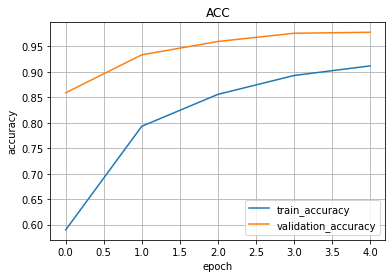

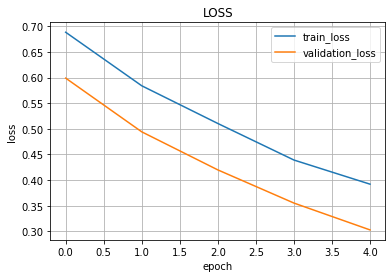

In [ ]:
plt.figure()
plt.title("ACC")
plt.plot(history.history['accuracy']) # change acc to accuracy if testing TF 2.0
plt.plot(history.history['val_accuracy']) # change val_accuracy if testing TF 2.0
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
plt.grid()
plt.show()


plt.figure()
plt.title("LOSS")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.grid()
plt.show()
